## Sprawozdanie2

**Data:** 2024-05-18  
**Autor:** Piotr Szepietowski

## Metoda iteracyjna Jacobiego

Metoda Jacobiego jest iteracyjną metodą rozwiązywania układów równań liniowych. Polega na następujących krokach:

1. **Warunek początkowy:** Układ równań musi być zapisany w postaci macierzowej Ax = b, gdzie:
    - A jest macierzą współczynników
    - x jest wektorem niewiadomych
    - b jest wektorem wyrazów wolnych

2. **Przekształcenie układu:** Dla każdego równania wyraża się niewiadomą xi przez pozostałe zmienne:
    ```
    x₁ = (b₁ - a₁₂x₂ - a₁₃x₃ - ... - a₁ₙxₙ) / a₁₁
    x₂ = (b₂ - a₂₁x₁ - a₂₃x₃ - ... - a₂ₙxₙ) / a₂₂
    ...
    xₙ = (bₙ - aₙ₁x₁ - aₙ₂x₂ - ... - aₙ,ₙ₋₁xₙ₋₁) / aₙₙ
    ```

3. **Iteracja:** W każdej iteracji k+1 nowe wartości x obliczane są na podstawie wartości z poprzedniej iteracji k:
    ```
    x⁽ᵏ⁺¹⁾ᵢ = (bᵢ - Σⱼ₌₁,ⱼ≠ᵢ aᵢⱼx⁽ᵏ⁾ⱼ) / aᵢᵢ
    ```

4. **Zbieżność:** Metoda jest zbieżna, gdy:
    - Macierz A jest diagonalnie dominująca
    - Elementy na przekątnej głównej są niezerowe

5. **Kryterium stopu:** Iteracje są wykonywane do momentu osiągnięcia zadanej dokładności ε:
    ```
    ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
    ```
---
## Metoda iteracyjna Gaussa-Seidla

Metoda Gaussa-Seidla jest udoskonaloną wersją metody Jacobiego, w której do obliczania nowych wartości x wykorzystuje się już zaktualizowane wartości z bieżącej iteracji.

1. **Warunek początkowy:** Układ równań w postaci Ax = b.

2. **Przekształcenie układu:** Podobnie jak w metodzie Jacobiego, każdą niewiadomą wyraża się przez pozostałe zmienne.

3. **Iteracja:** Nowe wartości x obliczane są sekwencyjnie, natychmiast wykorzystując najnowsze dostępne wartości:
    ```
    x⁽ᵏ⁺¹⁾ᵢ = (bᵢ - Σⱼ₌₁ⁱ₋₁ aᵢⱼx⁽ᵏ⁺¹⁾ⱼ - Σⱼ₌ᵢ₊₁ⁿ aᵢⱼx⁽ᵏ⁾ⱼ) / aᵢᵢ
    ```

4. **Zbieżność:** Metoda Gaussa-Seidla jest zbieżna, gdy macierz A jest diagonalnie dominująca lub dodatnio określona.  
    - **Macierz diagonalnie dominująca:** Dla każdego wiersza i zachodzi:  
      $$
      |a_{ii}| > \sum_{j \neq i} |a_{ij}|
      $$
    - **Macierz dodatnio określona:** Dla każdego niezerowego wektora $x$ zachodzi $x^T A x > 0$.  
    Spełnienie jednego z tych warunków gwarantuje zbieżność metody.

5. **Kryterium stopu:** Iteracje są wykonywane do osiągnięcia zadanej dokładności ε:
    ```
    ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
    ```

---

## Metoda iteracyjna SOR (Successive Over-Relaxation)

Metoda SOR jest rozszerzeniem metody Gaussa-Seidla, w której wprowadza się parametr relaksacji ω (omega), aby przyspieszyć zbieżność.

1. **Warunek początkowy:** Układ równań w postaci Ax = b.

2. **Przekształcenie układu:** Każdą niewiadomą wyraża się przez pozostałe zmienne, jak w poprzednich metodach.

3. **Iteracja:** Nowe wartości x obliczane są z użyciem parametru relaksacji ω:
    ```
    x⁽ᵏ⁺¹⁾ᵢ = (1 - ω)x⁽ᵏ⁾ᵢ + (ω / aᵢᵢ) * (bᵢ - Σⱼ₌₁ⁱ₋₁ aᵢⱼx⁽ᵏ⁺¹⁾ⱼ - Σⱼ₌ᵢ₊₁ⁿ aᵢⱼx⁽ᵏ⁾ⱼ)
    ```
    gdzie 0 < ω < 2.

4. **Zbieżność:**  
    - Metoda SOR jest zbieżna, gdy macierz A jest **dodatnio określona** lub **ściśle diagonalnie dominująca**.  
    - W praktyce, dla macierzy diagonalnie dominujących lub dodatnio określonych, istnieje wartość parametru relaksacji ω (zwykle $1 < \omega < 2$), dla której metoda SOR zbiega szybciej niż Gaussa-Seidla.  
    - Wybór optymalnego ω zależy od własności macierzy – zbyt małe lub zbyt duże wartości mogą spowolnić zbieżność lub nawet ją uniemożliwić.  
    - **Warunki formalne:**  
      - Jeśli A jest macierzą symetryczną i dodatnio określoną, metoda SOR jest zbieżna dla $0 < \omega < 2$.  
      - Jeśli A jest ściśle diagonalnie dominująca, metoda SOR również jest zbieżna dla $0 < \omega < 2$.  
    - W przypadku macierzy, które nie spełniają tych warunków, metoda SOR może nie być zbieżna niezależnie od wyboru ω.

5. **Kryterium stopu:** Iteracje są wykonywane do osiągnięcia zadanej dokładności ε:
    ```
    ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
    ```

In [2]:
import numpy as np
import time
from functools import wraps
from concurrent.futures import ThreadPoolExecutor, TimeoutError

timings = {'jacobi': [], 'gauss_seidel': [], 'sor': []}
iterations = {'jacobi': [], 'gauss_seidel': [], 'sor': []}
sizes = []

def record_stats(method_name, size, elapsed, iters):
    timings[method_name].append(elapsed)
    iterations[method_name].append(iters)
    if method_name == 'jacobi':
        sizes.append(size)

def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result, iter_count, printExtended = func(*args, **kwargs)
        end_time = time.time()
        elapsed = end_time - start_time
        method_name = func.__name__
        A = args[0]
        size = A.shape[0]
        record_stats(method_name, size, elapsed, iter_count)
        if printExtended:
            print(f"{method_name} took {elapsed:.4f} seconds to execute")
            print(f"{method_name} solution: {result}")
            print(f"Number of iterations: {iter_count}\n")
        return result
    return wrapper

@timer
def jacobi(A, b, x0=None, tol=1e-10, max_iter=1000, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    D = np.diag(A)
    if np.any(np.abs(D) < 1e-10):
        raise ValueError("Matrix contains zeros on the diagonal")
        
    R = A - np.diagflat(D)
    iter_count = 0
    
    while iter_count < max_iter:
        x_new = (b - np.dot(R, x)) / D
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count, printExtended
        x = x_new
        iter_count += 1
        
    raise ValueError(f"Failed to converge after {max_iter} iterations")

@timer
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iter=1000, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    iter_count = 0
    if np.any(np.abs(np.diag(A)) < 1e-10):
        raise ValueError("Matrix contains zeros on the diagonal")
    
    while iter_count < max_iter:
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count, printExtended
        x = x_new
        iter_count += 1
        
    raise ValueError(f"Failed to converge after {max_iter} iterations")

@timer
def sor(A, b, x0=None, omega=1.0, tol=1e-10, max_iter=1000, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    iter_count = 0
    if np.any(np.abs(np.diag(A)) < 1e-10):
        raise ValueError("Matrix contains zeros on the diagonal")
    
    while iter_count < max_iter:
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + (omega * (b[i] - sum1 - sum2)) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count, printExtended
        x = x_new
        iter_count += 1
        
    raise ValueError(f"Failed to converge after {max_iter} iterations")


---
## Test na przykładzie zawartym w prezentacji
Porównanie wyników oraz czasów i liczby koniecznych iteracji dla wszystkich trzech metod przy podanym w prezentacji przykładzie:

**Macierz A:**
$$
A = \begin{bmatrix}
3 & -1 & 0 & 0 & 0 & -1 \\
-1 & 3 & -1 & 0 & -1 & 0 \\
0 & -1 & 3 & -1 & 0 & 0 \\
0 & 0 & -1 & 3 & -1 & 0 \\
0 & -1 & 0 & -1 & 3 & -1 \\
-1 & 0 & 0 & 0 & -1 & 3 \\
\end{bmatrix}
$$

**Wektor b:**
$$
b = \begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
20 \\
\end{bmatrix}
$$

Poniżej przedstawiono wyniki, czasy wykonania oraz liczbę iteracji dla metod Jacobiego, Gaussa-Seidla i SOR.

In [2]:
A = np.array([[3,-1,0,0,0,-1], 
                  [-1,3,-1,0,-1,0],
                  [0,-1,3,-1,0,0],
                  [0,0,-1,3,-1,0],
                  [0,-1,0,-1,3,-1],
                  [-1,0,0,0,-1,3]], dtype=float)
b = np.array([0, 0, 0, 0, 0, 20], dtype=float)
print("Solving Ax = b using Jacobi, Gauss-Seidel, and SOR methods:\n")
print(f"Matrix A: {A}")
print(f"Vector b: {b}\n")
jacobi(A, b)
gauss_seidel(A, b)
sor(A, b, omega=1.25)

Solving Ax = b using Jacobi, Gauss-Seidel, and SOR methods:

Matrix A: [[ 3. -1.  0.  0.  0. -1.]
 [-1.  3. -1.  0. -1.  0.]
 [ 0. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.]
 [ 0. -1.  0. -1.  3. -1.]
 [-1.  0.  0.  0. -1.  3.]]
Vector b: [ 0.  0.  0.  0.  0. 20.]

jacobi took 0.0033 seconds to execute
jacobi solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 111

gauss_seidel took 0.0039 seconds to execute
gauss_seidel solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 59

sor took 0.0011 seconds to execute
sor solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 31



array([ 4.82142857,  4.28571429,  2.32142857,  2.67857143,  5.71428571,
       10.17857143])

## Porównanie wyników 
  
Dla przykładowej macierzy 6x6 wszystkie trzy metody (Jacobiego, Gaussa-Seidla, SOR) dają bardzo zbliżone wyniki, a liczba iteracji i czas wykonania są niewielkie:

- **Jacobi:** 111 iteracji, czas ≈ 0.0033 s  
- **Gauss-Seidel:** 59 iteracji, czas ≈ 0.0039 s  
- **SOR (ω=1.25):** 31 iteracji, czas ≈ 0.0011 s  

Widać, że metoda SOR jest najszybsza i wymaga najmniej iteracji, co potwierdza jej przewagę przy odpowiednim doborze parametru relaksacji.  
Metoda Gaussa-Seidla jest wyraźnie szybsza od Jacobiego, ale wolniejsza od SOR.  
Dla małych macierzy różnice są niewielkie, jednak przy większych rozmiarach przewaga SOR i Gaussa-Seidla staje się bardziej widoczna
## Test dla większej macierzy
Porwnane zostaną wyniki dla przykładowej macierzy o rozmiarze 100x100.

In [3]:
np.random.seed(42)
n_big = 100
A_big = np.random.rand(n_big, n_big)
for i in range(n_big):
    A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
b_big = np.random.rand(n_big)
print("Solving large Ax = b using Jacobi, Gauss-Seidel, and SOR methods:\n")
print(f"Matrix A_big shape: {A_big.shape}")
print(f"Vector b_big shape: {b_big.shape}\n")
jacobi(A_big, b_big)
gauss_seidel(A_big, b_big)
sor(A_big, b_big, omega=1.1)

Solving large Ax = b using Jacobi, Gauss-Seidel, and SOR methods:

Matrix A_big shape: (100, 100)
Vector b_big shape: (100,)

jacobi took 0.0112 seconds to execute
jacobi solution: [ 0.00229301  0.00195356 -0.0016806   0.00756728  0.0046642   0.01055513
 -0.00420647  0.00703916  0.01192984  0.01108987  0.01116383  0.00778824
  0.01431929  0.00082582  0.00456215 -0.0048794  -0.00496447 -0.00036007
 -0.0031383   0.00040732 -0.00184566 -0.00414269  0.01356815 -0.00536125
  0.00883103 -0.00167893  0.01446273  0.01259537  0.00747044  0.00741375
 -0.00502105  0.01476419  0.01349126  0.01212128  0.00702638  0.00154668
  0.01453166  0.00074726  0.00601119 -0.0023647   0.0132924  -0.00249282
 -0.0005428   0.00645312  0.01006416  0.00708295 -0.00043969 -0.0053446
  0.01129899  0.01343764  0.01209925  0.00380579  0.01324222  0.00290635
  0.00590929  0.0046029   0.00395286  0.00964509  0.00544047  0.00074643
 -0.00048151 -0.0043972   0.00613891 -0.00047596 -0.00250632  0.00853442
  0.00855291  0.0

array([ 0.00229301,  0.00195356, -0.0016806 ,  0.00756728,  0.0046642 ,
        0.01055513, -0.00420647,  0.00703916,  0.01192984,  0.01108987,
        0.01116383,  0.00778824,  0.01431929,  0.00082582,  0.00456215,
       -0.0048794 , -0.00496447, -0.00036007, -0.0031383 ,  0.00040732,
       -0.00184566, -0.00414269,  0.01356815, -0.00536125,  0.00883103,
       -0.00167893,  0.01446273,  0.01259537,  0.00747044,  0.00741375,
       -0.00502105,  0.01476419,  0.01349126,  0.01212128,  0.00702638,
        0.00154668,  0.01453166,  0.00074726,  0.00601119, -0.0023647 ,
        0.0132924 , -0.00249282, -0.0005428 ,  0.00645312,  0.01006416,
        0.00708295, -0.00043969, -0.0053446 ,  0.01129899,  0.01343764,
        0.01209925,  0.00380579,  0.01324222,  0.00290635,  0.00590929,
        0.0046029 ,  0.00395286,  0.00964509,  0.00544047,  0.00074643,
       -0.00048151, -0.0043972 ,  0.0061389 , -0.00047596, -0.00250632,
        0.00853442,  0.00855291,  0.00924709,  0.00560827,  0.01

## Porównanie wyników
  
Dla macierzy 100x100 różnice między metodami stają się bardziej widoczne:

- **Jacobi:** 616 iteracji, czas ≈ 0.0112 s  
- **Gauss-Seidel:** 14 iteracji, czas ≈ 0.0079 s  
- **SOR (ω=1.1):** 17 iteracji, czas ≈ 0.0139 s  

W przypadku większych macierzy metoda Gaussa-Seidla i SOR wykazują znacznie lepszą zbieżność niż metoda Jacobiego. Liczba iteracji Jacobiego rośnie bardzo szybko, podczas gdy Gauss-Seidel i SOR osiągają rozwiązanie w kilkunastu krokach. Czas wykonania dla wszystkich metod pozostaje niski, jednak przewaga metod Gaussa-Seidla i SOR jest wyraźna pod względem liczby iteracji, chociaż pojedyńcza iteracja tych rozwiązań trwa wyraźnie dłużej niż przy metodzie Jacobi.  
W kolejnych krokach zostanie przeprowadzone porównanie dla jeszcze większych macierzy, oraz ich większej liczby, a na podstawie tego stworzony zostanie wykres liczby iteracji od rozmiaru macierzy oraz czasu rozwiązania od rozmiaru macierzy.

In [4]:
for n_big in range(200, 2001, 100):
    np.random.seed(42)
    A_big = np.random.rand(n_big, n_big)
    for i in range(n_big):
        A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
    b_big = np.random.rand(n_big)
    jacobi(A_big, b_big, printExtended=False)
    gauss_seidel(A_big, b_big, printExtended=False)
    sor(A_big, b_big, omega=1.1, printExtended=False)

for n_big in range(2200, 4001, 200):
    np.random.seed(42)
    A_big = np.random.rand(n_big, n_big)
    for i in range(n_big):
        A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
    b_big = np.random.rand(n_big)
    jacobi(A_big, b_big, printExtended=False)
    gauss_seidel(A_big, b_big, printExtended=False)
    sor(A_big, b_big, omega=1.1, printExtended=False)

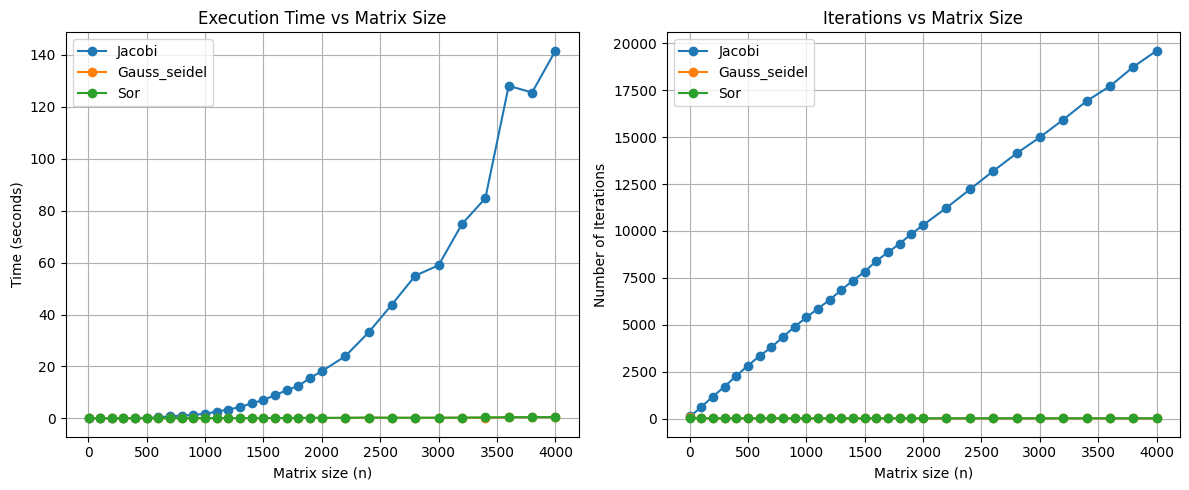

In [6]:
import matplotlib.pyplot as plt

# Plot timings
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for method in timings:
    plt.plot(sizes, timings[method], marker='o', label=method.capitalize())
plt.xlabel('Matrix size (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.grid(True)

# Plot iterations
plt.subplot(1, 2, 2)
for method in iterations:
    plt.plot(sizes, iterations[method], marker='o', label=method.capitalize())
plt.xlabel('Matrix size (n)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Matrix Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Analiza Wykresu
Bardzo wyraźna jest przy większych macierzach różnica zarówno w czasie wykonywania oraz w ilości potrzebnych iteracji.

## Przykłady macierzy, dla których te metody nie są zbieżne
Przykłady macierzy, dla których metody iteracyjne nie są zbieżne:

**1. Macierze z zerami na przekątnej**  
Każda macierz z zerami na przekątnej natychmiast powoduje problemy:  
Przykład:  
$$
A = \begin{bmatrix}
0 & 1 & 2 \\
1 & 2 & 0 \\
3 & 0 & 0 \\
\end{bmatrix}
$$

**2. Macierze niebędące dodatnio określonymi**  
Gdy macierz symetryczna nie jest dodatnio określona:  
Przykład:  
$$
A = \begin{bmatrix}
1 & 2 \\
2 & -1 \\
\end{bmatrix}
$$

In [4]:
class TimeoutException(Exception):
    pass

# Set timeout in seconds
TIMEOUT = 5

def run_with_timeout(func, *args, timeout=TIMEOUT, **kwargs):
    with ThreadPoolExecutor(max_workers=1) as executor:
        future = executor.submit(func, *args, **kwargs)
        try:
            return future.result(timeout=timeout)
        except TimeoutError:
            raise TimeoutException("Time limit exceeded")
        except Exception as e:
            raise e  # Re-raise other exceptions

# Test matrices
print("Running tests on problematic matrices...\n")

# 1. Matrix with zeros on diagonal
print("Test 1: Matrix with zeros on diagonal")
A_zero_diag = np.array([
    [0, 1, 2],
    [1, 2, 0],
    [3, 0, 0]
], dtype=float)
b_zero_diag = np.array([1, 2, 3], dtype=float)

for method_func, name, kwargs in [
    (jacobi, "Jacobi", {"max_iter": 100}),
    (gauss_seidel, "Gauss-Seidel", {"max_iter": 100}),
    (sor, "SOR", {"omega": 1.1, "max_iter": 100})
]:
    try:
        result = run_with_timeout(method_func, A_zero_diag, b_zero_diag, printExtended=False, **kwargs)
        print(f"{name}: Unexpectedly converged (should fail with zeros on diagonal)")
    except TimeoutException as e:
        print(f"{name}: {e}")
    except Exception as e:
        print(f"{name}: {str(e)}")
print()

# 2. Indefinite matrix (non-positive definite)
print("Test 2: Indefinite matrix (non-positive definite)")
A_not_posdef = np.array([
    [1, 2],
    [2, -1]
], dtype=float)
b_not_posdef = np.array([1, 1], dtype=float)

for method_func, name, kwargs in [
    (jacobi, "Jacobi", {"max_iter": 500}),
    (gauss_seidel, "Gauss-Seidel", {"max_iter": 500}),
    (sor, "SOR", {"omega": 1.1, "max_iter": 500})
]:
    try:
        result = run_with_timeout(method_func, A_not_posdef, b_not_posdef, printExtended=False, **kwargs)
        print(f"{name}: Converged to {result}")
    except TimeoutException as e:
        print(f"{name}: {e}")
    except Exception as e:
        print(f"{name}: {str(e)}")
print()

# 3. Non-diagonally dominant matrix
print("Test 3: Non-diagonally dominant matrix")
A_not_diag_dom = np.array([
    [1, 2],
    [3, 1]
], dtype=float)
b_not_diag_dom = np.array([5, 6], dtype=float)

for method_func, name, kwargs in [
    (jacobi, "Jacobi", {"max_iter": 500}),
    (gauss_seidel, "Gauss-Seidel", {"max_iter": 500}),
    (sor, "SOR", {"omega": 0.5, "max_iter": 500})  # Try a small omega to help convergence
]:
    try:
        result = run_with_timeout(method_func, A_not_diag_dom, b_not_diag_dom, printExtended=False, **kwargs)
        print(f"{name}: Converged to {result}")
    except TimeoutException as e:
        print(f"{name}: {e}")
    except Exception as e:
        print(f"{name}: {str(e)}")
print()

# 4. Ill-conditioned matrix
print("Test 4: Ill-conditioned matrix")
A_ill_cond = np.array([
    [1000, 999],
    [999, 998]
], dtype=float)
b_ill_cond = np.array([1999, 1997], dtype=float)

for method_func, name, kwargs in [
    (jacobi, "Jacobi", {"max_iter": 5000}),
    (gauss_seidel, "Gauss-Seidel", {"max_iter": 5000}),
    (sor, "SOR", {"omega": 0.8, "max_iter": 5000})  # Try a conservative omega
]:
    try:
        result = run_with_timeout(method_func, A_ill_cond, b_ill_cond, printExtended=False, **kwargs)
        print(f"{name}: Converged to {result}")
    except TimeoutException as e:
        print(f"{name}: {e}")
    except Exception as e:
        print(f"{name}: {str(e)}")
print()

# 5. Matrix with complex eigenvalues
print("Test 5: Matrix with complex eigenvalues outside unit circle")
A_complex = np.array([
    [3, 4],
    [-4, 3]
], dtype=float)
b_complex = np.array([7, -1], dtype=float)

for method_func, name, kwargs in [
    (jacobi, "Jacobi", {"max_iter": 1000}),
    (gauss_seidel, "Gauss-Seidel", {"max_iter": 1000}),
    (sor, "SOR", {"omega": 0.5, "max_iter": 1000})  # Try a small omega
]:
    try:
        result = run_with_timeout(method_func, A_complex, b_complex, printExtended=False, **kwargs)
        print(f"{name}: Converged to {result}")
    except TimeoutException as e:
        print(f"{name}: {e}")
    except Exception as e:
        print(f"{name}: {str(e)}")
print()

Running tests on problematic matrices...

Test 1: Matrix with zeros on diagonal
Jacobi: Matrix contains zeros on the diagonal
Gauss-Seidel: Matrix contains zeros on the diagonal
SOR: Matrix contains zeros on the diagonal

Test 2: Indefinite matrix (non-positive definite)
Jacobi: Failed to converge after 500 iterations
Gauss-Seidel: Failed to converge after 500 iterations
SOR: Failed to converge after 500 iterations

Test 3: Non-diagonally dominant matrix
Jacobi: Failed to converge after 500 iterations
Gauss-Seidel: Failed to converge after 500 iterations
SOR: Failed to converge after 500 iterations

Test 4: Ill-conditioned matrix
Jacobi: Failed to converge after 5000 iterations
Gauss-Seidel: Failed to converge after 5000 iterations


C:\Users\szepiet33\AppData\Local\Temp\ipykernel_15140\3253491990.py:73: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x, ord=np.inf) < tol:


SOR: Failed to converge after 5000 iterations

Test 5: Matrix with complex eigenvalues outside unit circle
Jacobi: Failed to converge after 1000 iterations
Gauss-Seidel: Failed to converge after 1000 iterations
SOR: Converged to [1. 1.]




---
## Wykres szybkości zbieżności dla zadanego błędu


---
## Wykres wpływu współczynnika relaksacji na zbieżność metody SOR